# Parte 1 – Preparação do Ambiente e Dados
> ### Agora, carregamos o dataset e fazemos a limpeza inicial.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from dotenv import load_dotenv
from fastapi import FastAPI
from langchain_groq import ChatGroq
from langchain.schema import HumanMessage
from langchain.vectorstores import FAISS
from sentence_transformers import SentenceTransformer
from pydantic import BaseModel


In [15]:
# Carregar variáveis de ambiente
load_dotenv()
groq_api_key = os.getenv("GROQ_API_KEY")

# Carregar o dataset
df = pd.read_csv('data/rows.csv', low_memory=False)

# Visualizar colunas disponíveis
print(df.columns)

# Remover colunas irrelevantes
df = df[['Date received', 'Product', 'Issue', 'Consumer complaint narrative', 'Company']].dropna()

# Converter colunas de data para o formato correto
df['Date received'] = pd.to_datetime(df['Date received'])

# Exibir amostra dos dados
df.head()

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


,Date received,Product,Issue,Consumer complaint narrative,Company
29904,2019-03-23,"Credit reporting, credit repair services, or o...",Incorrect information on your report,The Summer of XX/XX/2018 I was denied a mortga...,"TRANSUNION INTERMEDIATE HOLDINGS, INC."
30629,2019-03-22,"Credit reporting, credit repair services, or o...",Incorrect information on your report,There are many mistakes appear in my report wi...,"TRANSUNION INTERMEDIATE HOLDINGS, INC."
30735,2019-03-22,"Credit reporting, credit repair services, or o...",Incorrect information on your report,There are many mistakes appear in my report wi...,"TRANSUNION INTERMEDIATE HOLDINGS, INC."
30795,2019-03-22,"Credit reporting, credit repair services, or o...",Incorrect information on your report,There are many mistakes appear in my report wi...,"TRANSUNION INTERMEDIATE HOLDINGS, INC."
30807,2019-03-22,"Credit reporting, credit repair services, or o...",Incorrect information on your report,There are many mistakes appear in my report wi...,"TRANSUNION INTERMEDIATE HOLDINGS, INC."


#### Removemos colunas irrelevantes para focar em Produto, Problema e Reclamação.
#### Convertido datas para melhorar a análise de tempo.

# Parte 2 – Análise Exploratória com Seaborn
> ### Agora, exploramos tendências no dataset antes da IA.

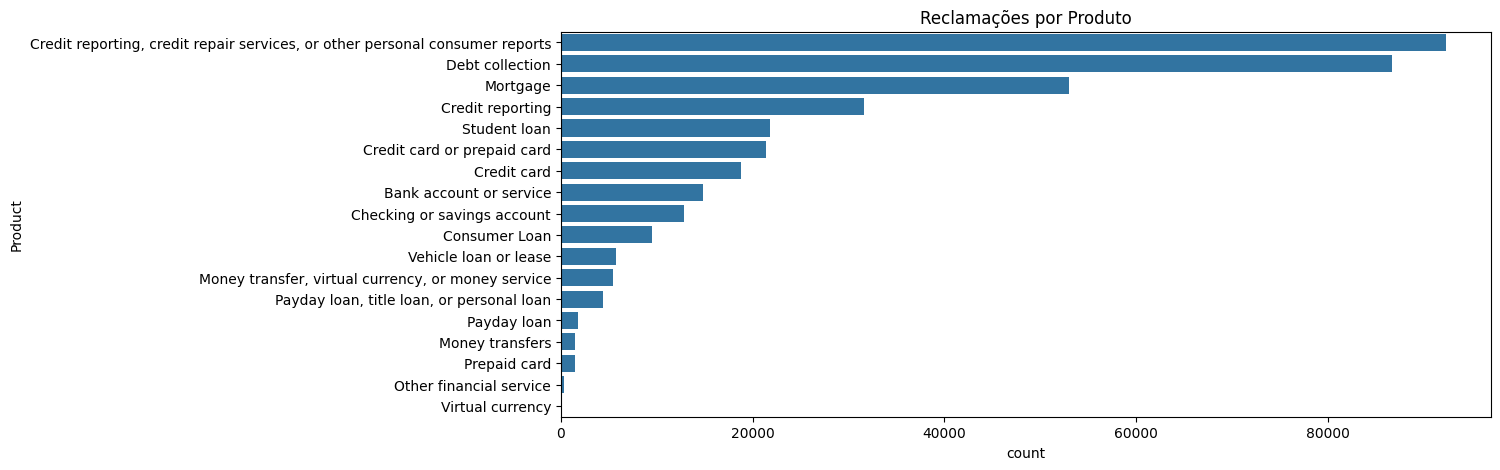

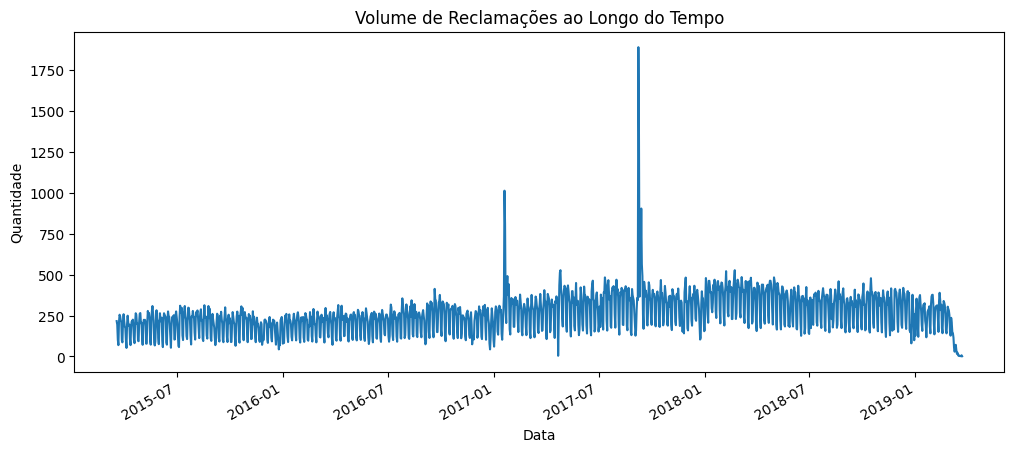

In [17]:
# Contagem de reclamações por Produto
plt.figure(figsize=(12, 5))
sns.countplot(y=df["Product"], order=df["Product"].value_counts().index)
plt.title("Reclamações por Produto")
plt.show()

# Análise de reclamações ao longo do tempo
plt.figure(figsize=(12, 5))
df.groupby('Date received').size().plot()
plt.title("Volume de Reclamações ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Quantidade")
plt.show()



#### Seaborn e Matplotlib ajudam a identificar padrões visuais antes da modelagem.
#### Analisamos produtos mais problemáticos e tendências temporais.

# Parte 3 – Configuração da IA com Groq
> ### Agora, integramos LangChain com Groq Mixtral-8x7B-32768.

In [25]:
# Inicializar modelo Groq
llm = ChatGroq(model_name="mixtral-8x7b-32768", api_key='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')

# Testar com uma pergunta simples
response = llm.invoke([HumanMessage(content="Resumo das principais reclamações dos consumidores")])
print(response.content)


As principais reclamações dos consumidores geralmente variam de acordo com o país, constante e indústria, mas algumas reclamações comuns incluem:

1. Problemas com produtos ou serviços: isso pode incluir produtos defeituosos, serviços inadequados ou falta de conformidade com as promessas feitas pelo fornecedor.
2. Falta de transparência nos preços e taxas: os consumidores se queixam frequentemente de cobranças ocultas, taxas adicionais e falta de clareza nas informações de preços.
3. Dificuldades na resolução de problemas: muitos consumidores relatam dificuldades em obter soluções satisfatórias para seus problemas, incluindo falta de resposta ou respostas inadequadas das empresas.
4. Práticas enganosas ou enganadoras: os consumidores podem se sentir enganados ou enganados por práticas de marketing enganosas ou enganadoras, como publicidade enganosa ou falta de divulgação de informações importantes.
5. Falta de privacidade: a preocupação com a privacidade dos dados pessoais é uma reclam

# Parte 4 – Criar Assistente de Análise de Dados
> ### Agora, criamos uma API FastAPI que recebe reclamações e retorna insights.

In [27]:
# Iniciar API
app = FastAPI()

class ComplaintRequest(BaseModel):
    product: str
    issue: str
    narrative: str

@app.post("/analyze")
def analyze_complaint(complaint: ComplaintRequest):
    prompt = f"""
    Produto: {complaint.product}
    Problema: {complaint.issue}
    Reclamação: {complaint.narrative}

    Analise esta reclamação e forneça insights sobre padrões comuns e possíveis melhorias.
    """
    response = llm([HumanMessage(content=prompt)])
    return {"insight": response.content}


## Rodando a API
### Para rodar a API:

In [29]:
uvicorn main:app --reload

SyntaxError: invalid syntax (3807844594.py, line 1)

### FastAPI transforma nosso modelo em uma API.
### Os nputs são validados com Pydantic.
### Groq gera insights automáticos sobre reclamações.